## AN EXAMINATION OF STATISTICAL RELATIONSHIPS BETWEEN THE LIFE EXPECTANCY AND GDP OF SIX NATIONS

A project for my Codecademy Professional Certification (Data Scientist: Machine Learning Specialist)

Robert Hall

08/01/2024

#### Table of Contents

* [Load, Clean, and Familiarize with Data](#load-clean-and-familiarize-with-data)
* [Determining the Mean Life Expectancies and GDPs of Each Nation](#determining-the-mean-life-expectancies-and-gdps-of-each-nation)
* [Examining the Rate of Change in Life Expectancy over the Period Surveyed](#examining-the-rate-of-change-in-life-expectancy-over-the-period-surveyed)
* [Examining the Rate of Change in Gross Domestic Product (in USD) over the Period Surveyed](#examining-the-rate-of-change-in-gross-domestic-product-in-usd-over-the-period-surveyed)
* [Analyzing the Correlation between Gross Domestic Product and Life Expectancy, on a Per Nation and Overall Basis](#analyzing-the-correlation-between-gross-domestic-product-and-life-expectancy-on-a-per-nation-and-overall-basis)
* [Summary Analysis and Overall Assessment](#summary-analysis-and-overall-assessment)

#### Load, Clean, and Familiarize with Data

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import statsmodels.api as sm 

In [16]:
data = pd.read_csv('data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [17]:
data = data.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy', 'GDP': 'GDP'})
data['Country'] = data['Country'].replace('United States of America', 'USA')
data.head()

# shortening column and country names for ease when evoking features and data later on

,Country,Year,Life Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [18]:
data['GDP'] = data['GDP'] / 1e9
data.head()

# converting GDP from USD $1 into USD $1B

,Country,Year,Life Expectancy,GDP
0,Chile,2000,77.3,77.860932
1,Chile,2001,77.3,70.979924
2,Chile,2002,77.8,69.736811
3,Chile,2003,77.9,75.643460
4,Chile,2004,78.0,99.210393


In [19]:
# separating data by country, as it will be necessary later

chile_data = data[data['Country'] == 'Chile']
china_data = data[data['Country'] == 'China']
germany_data = data[data['Country'] == 'Germany']
mexico_data = data[data['Country'] == 'Mexico']
usa_data = data[data['Country'] == 'USA']
zimb_data = data[data['Country'] == 'Zimbabwe']

#### Determining the Mean Life Expectancies and GDPs of Each Nation

In [20]:
life_expectancy_means = data.groupby('Country')['Life Expectancy'].mean().reset_index()
life_expectancy_means

,Country,Life Expectancy
0,Chile,78.94375
1,China,74.26250
2,Germany,79.65625
3,Mexico,75.71875
4,USA,78.06250
5,Zimbabwe,50.09375


In [21]:
gdp_means = data.groupby('Country')['GDP'].mean().reset_index()
gdp_means

,Country,GDP
0,Chile,169.83947
1,China,4961.25000
2,Germany,3095.00000
3,Mexico,976.25000
4,USA,14075.00000
5,Zimbabwe,9.06258


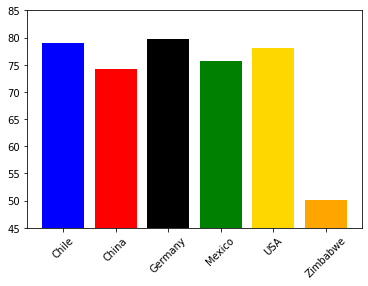

<Figure size 432x288 with 0 Axes>

In [22]:
life_expectancies = life_expectancy_means['Life Expectancy']
countries = life_expectancy_means['Country']
colors = ['blue', 'red', 'black', 'green', 'gold', 'orange']

plt.bar(countries, life_expectancies, color=colors)
plt.xticks(rotation=45)
plt.ylim(45, 85)
plt.show()
plt.clf()

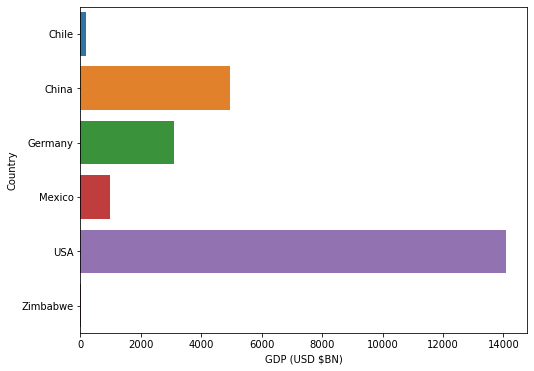

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=gdp_means)
plt.xlabel("GDP (USD $BN)");

#### Examining the Rate of Change in Life Expectancy over the Period Surveyed

In [24]:
# Finding average rates of change in life expectancy per country

chile_avg_roc_le = round((chile_data['Life Expectancy'].max() - chile_data['Life Expectancy'].min()) / (chile_data['Year'].max() - chile_data['Year'].min()), 2)
print(f"Chile Avg Rate of Change (Life Expectancy):     {chile_avg_roc_le} lifespan-year increases per year")

china_avg_roc_le = round((china_data['Life Expectancy'].max() - china_data['Life Expectancy'].min()) / (china_data['Year'].max() - china_data['Year'].min()), 2)
print(f"China Avg Rate of Change (Life Expectancy):     {china_avg_roc_le} lifespan-year increases per year")

germany_avg_roc_le = round((germany_data['Life Expectancy'].max() - germany_data['Life Expectancy'].min()) / (germany_data['Year'].max() - germany_data['Year'].min()), 2)
print(f"Germany Avg Rate of Change (Life Expectancy):     {germany_avg_roc_le} lifespan-year increases per year")

mexico_avg_roc_le = round((mexico_data['Life Expectancy'].max() - mexico_data['Life Expectancy'].min()) / (mexico_data['Year'].max() - mexico_data['Year'].min()), 2)
print(f"Mexico Avg Rate of Change (Life Expectancy):     {mexico_avg_roc_le} lifespan-year increases per year")

usa_avg_roc_le = round((usa_data['Life Expectancy'].max() - usa_data['Life Expectancy'].min()) / (usa_data['Year'].max() - usa_data['Year'].min()), 2)
print(f"USA Avg Rate of Change (Life Expectancy):     {usa_avg_roc_le} lifespan-year increases per year")

zimb_avg_roc_le = round((zimb_data['Life Expectancy'].max() - zimb_data['Life Expectancy'].min()) / (zimb_data['Year'].max() - zimb_data['Year'].min()), 2)
print(f"Zimbabwe Avg Rate of Change (Life Expectancy):     {zimb_avg_roc_le} lifespan-year increases per year")

Chile Avg Rate of Change (Life Expectancy):     0.21 lifespan-year increases per year
China Avg Rate of Change (Life Expectancy):     0.29 lifespan-year increases per year
Germany Avg Rate of Change (Life Expectancy):     0.2 lifespan-year increases per year
Mexico Avg Rate of Change (Life Expectancy):     0.13 lifespan-year increases per year
USA Avg Rate of Change (Life Expectancy):     0.17 lifespan-year increases per year
Zimbabwe Avg Rate of Change (Life Expectancy):     1.09 lifespan-year increases per year


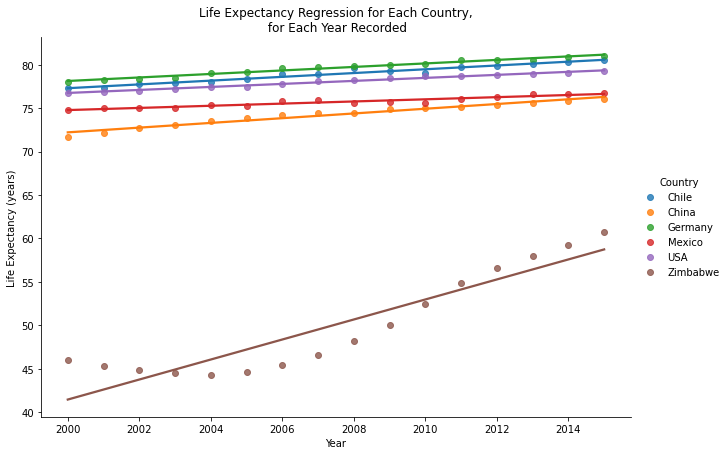

<Figure size 432x288 with 0 Axes>

In [25]:
sns.lmplot(x='Year', 
           y='Life Expectancy', 
           hue='Country', 
           data=data, 
           ci=None, 
           aspect=1.5, 
           height=6)
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.title("Life Expectancy Regression for Each Country,\n for Each Year Recorded")
plt.show()
plt.clf()

#### Examining the Rate of Change in Gross Domestic Product (in USD) over the Period Surveyed

In [26]:
chile_avg_roc_gdp = round((chile_data['GDP'].max() - chile_data['GDP'].min()) / (chile_data['Year'].max() - chile_data['Year'].min()))
print(f"Chile Avg Rate of Change (GDP):     ~ ${chile_avg_roc_gdp} BN increase per year")

china_avg_roc_gdp = round((china_data['GDP'].max() - china_data['GDP'].min()) / (china_data['Year'].max() - china_data['Year'].min()))
print(f"China Avg Rate of Change (GDP):     ~ ${china_avg_roc_gdp} BN increase per year")

germany_avg_roc_gdp = round((germany_data['GDP'].max() - germany_data['GDP'].min()) / (germany_data['Year'].max() - germany_data['Year'].min()))
print(f"Germany Avg Rate of Change (GDP):    ~ ${germany_avg_roc_gdp} BN increase per year")

mexico_avg_roc_gdp = round((mexico_data['GDP'].max() - mexico_data['GDP'].min()) / (mexico_data['Year'].max() - mexico_data['Year'].min()))
print(f"Mexico Avg Rate of Change (GDP):    ~ ${mexico_avg_roc_gdp} BN increase per year")

usa_avg_roc_gdp = round((usa_data['GDP'].max() - usa_data['GDP'].min()) / (usa_data['Year'].max() - usa_data['Year'].min()))
print(f"USA Avg Rate of Change (GDP):    ~ ${usa_avg_roc_gdp} BN increase per year")

zimb_avg_roc_gdp = round((zimb_data['GDP'].max() - zimb_data['GDP'].min()) / (zimb_data['Year'].max() - zimb_data['Year'].min()))
print(f"Zimbabwe Avg Rate of Change (GDP):    ~ ${zimb_avg_roc_gdp} BN increase per year")

Chile Avg Rate of Change (GDP):     ~ $14 BN increase per year
China Avg Rate of Change (GDP):     ~ $659 BN increase per year
Germany Avg Rate of Change (GDP):    ~ $129 BN increase per year
Mexico Avg Rate of Change (GDP):    ~ $41 BN increase per year
USA Avg Rate of Change (GDP):    ~ $520 BN increase per year
Zimbabwe Avg Rate of Change (GDP):    ~ $1 BN increase per year


Text(0.5, 1.0, 'National GDP Per Year (USD $BN)')

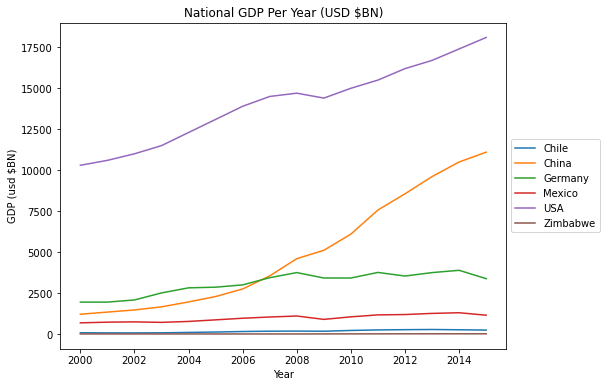

In [27]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year, y=data.GDP, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP (usd $BN)")
plt.title("National GDP Per Year (USD $BN)")

#### Visualizing the Correlation between Gross Domestic Product and Life Expectancy, on a Per Nation and Overall Basis

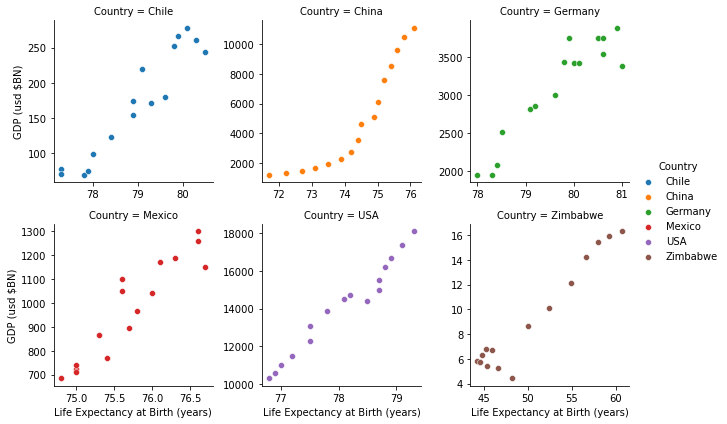

In [28]:
graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life Expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life Expectancy at Birth (years)", "GDP (usd $BN)"))

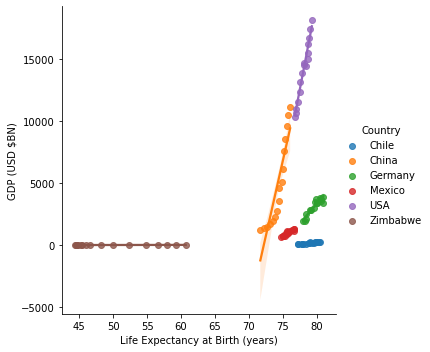

<Figure size 432x288 with 0 Axes>

In [29]:
# trendlines indicating correlations between life expectancy and GDP

sns.lmplot(x='Life Expectancy', y='GDP', hue='Country', data=data)
plt.xlabel("Life Expectancy at Birth (years)")
plt.ylabel("GDP (USD $BN)")
plt.show()
plt.clf()

#### Summary Analysis and Overall Assessment

* Life Expectancy is positively correlated with GDP in each nation surveyed other than Zimbabwe, which had both a declining life expectancy and an increasing GDP from the years ~2000 to ~2005.
* The USA has the highest average GDP of ~ $14 Trillion.
* Germany has the highest average life expectancy of 79.65 years to the average individual.
* Zimbabwe has the highest growth rate in life expectancy of all six countries, with on average a 1.09 lifespan-year increase each year.
* China has the highest growth rate in GDP of all six countries, with on average a ~ $659 Billion increase in GDP year-over-year.